# AIT Development notebook

## notebook of structure

| #  | Name                                               | cells | for_dev | edit               | description                                                                |
|----|----------------------------------------------------|-------|---------|--------------------|----------------------------------------------------------------------------|
| 1  | [Environment detection](##1-Environment-detection) | 1     | No      | uneditable         | detect whether the notebook are invoked for packaging or in production     |
| 2  | [Preparing AIT SDK](##2-Preparing-AIT-SDK)         | 1     | Yes     | uneditable         | download and install AIT SDK                                               |
| 3  | [Dependency Management](##3-Dependency-Management) | 3     | Yes     | required(cell #2)  | generate requirements.txt for Docker container                             |
| 4  | [Importing Libraries](##4-Importing-Libraries)     | 2     | Yes     | required(cell #1)  | import required libraries                                                  |
| 5  | [Manifest Generation](##5-Manifest-Generation)     | 1     | Yes     | required           | generate AIT Manifest                                                      |
| 6  | [Prepare for the Input](##6-Prepare-for-the-Input) | 1     | Yes     | required           | generate AIT Input JSON (inventory mapper)                                 |
| 7  | [Initialization](##7-Initialization)               | 1     | No      | uneditable         | initialization for AIT execution                                           |
| 8  | [Function definitions](##8-Function-definitions)   | N     | No      | required           | define functions invoked from Main area.<br> also define output functions. |
| 9  | [Main Algorithms](##9-Main-Algorithms)             | 1     | No      | required           | area for main algorithms of an AIT                                         |
| 10 | [Entry point](##10-Entry-point)                    | 1     | No      | uneditable         | an entry point where Qunomon invoke this AIT from here                     |
| 11 | [License](##11-License)                            | 1     | Yes     | required           | generate license information                                               |
| 12 | [Deployment](##12-Deployment)                      | 1     | Yes     | uneditable         | convert this notebook to the python file for packaging purpose             |

## notebook template revision history

1.0.1 2020/10/21

* add revision history
* separate `create requirements and pip install` editable and noeditable
* separate `import` editable and noeditable

1.0.0 2020/10/12

* new cerarion

## body

### #1 Environment detection

[uneditable]

In [1]:
# Determine whether to start AIT or jupyter by startup argument
import sys
is_ait_launch = (len(sys.argv) == 2)

### #2 Preparing AIT SDK

[uneditable]

In [2]:
if not is_ait_launch:
    # get ait-sdk file name
    from pathlib import Path
    from glob import glob
    import re
    import os

    current_dir = %pwd

    ait_sdk_path = "./ait_sdk-*-py3-none-any.whl"
    ait_sdk_list = glob(ait_sdk_path)
    ait_sdk_name = os.path.basename(ait_sdk_list[-1])

    # install ait-sdk
    !pip install -q --upgrade pip
    !pip install -q --no-deps --force-reinstall ./$ait_sdk_name

### #3 Dependency Management

#### #3-1 [uneditable]

In [3]:
if not is_ait_launch:
    from ait_sdk.common.files.ait_requirements_generator import AITRequirementsGenerator
    requirements_generator = AITRequirementsGenerator()

#### #3-2 [required]

In [4]:
if not is_ait_launch:
    !pip uninstall -y aif360 # Jupyter上で、複数回実行時パッチの適用に不具合が発生するため、毎回AIF360を削除する

Found existing installation: aif360 0.6.1
Uninstalling aif360-0.6.1:
  Successfully uninstalled aif360-0.6.1


In [5]:
if not is_ait_launch:
     requirements_generator.add_package('pandas','2.2.3')
     requirements_generator.add_package('numpy','1.26.4')
     requirements_generator.add_package('git+https://github.com/intersectional-fairness/isf.git#egg=Intersectional_Fairness==0.1.0')

In [6]:
if not is_ait_launch:
    !apt-get update && apt-get install -y python3-tk

Hit:1 http://deb.debian.org/debian bullseye InRelease
Hit:2 http://deb.debian.org/debian-security bullseye-security InRelease
Hit:3 http://deb.debian.org/debian bullseye-updates InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3-tk is already the newest version (3.9.2-1).
0 upgraded, 0 newly installed, 0 to remove and 144 not upgraded.


#### #3-3 [uneditable]

In [7]:
if not is_ait_launch:
    requirements_generator.add_package(f'./{ait_sdk_name}')
    requirements_path = requirements_generator.create_requirements(current_dir)

    !pip install -q -r $requirements_path 

DEPRECATION: git+https://github.com/intersectional-fairness/isf.git#egg=Intersectional_Fairness==0.1.0 contains an egg fragment with a non-PEP 508 name pip 25.0 will enforce this behaviour change. A possible replacement is to use the req @ url syntax, and remove the egg fragment. Discussion can be found at https://github.com/pypa/pip/issues/11617


### #4 Importing Libraries

#### #4-1 [required]

In [8]:
# isf用パッチ差し替え
if not is_ait_launch:
    location="/usr/local/lib/python3.9/site-packages"
    aif_360_home=location+"/aif360"
    !patch {aif_360_home}/algorithms/postprocessing/reject_option_classification.py patches/reject_option_classification.patch
    !patch {aif_360_home}/datasets/structured_dataset.py patches/structured_dataset.patch

patching file /usr/local/lib/python3.9/site-packages/aif360/algorithms/postprocessing/reject_option_classification.py
patching file /usr/local/lib/python3.9/site-packages/aif360/datasets/structured_dataset.py


In [9]:
if not is_ait_launch:
    !pip show Intersectional-Fairness # isf用パッチ差し替え

Name: Intersectional-Fairness
Version: 0.1.0
Summary: Intersectional Fairness (ISF) is a bias detection and mitigation technology for intersectional bias, which combinations of multiple protected attributes causes.
Home-page: 
Author: Fujitsu Limited
Author-email: fj-isf-contact@dl.jp.fujitsu.com
License: Apache-2.0
Location: /usr/local/lib/python3.9/site-packages
Requires: aif360, cvxpy, fairlearn, scikit-learn, seaborn, tensorflow
Required-by: 


In [10]:
# import if you need modules cell
from isf.core.intersectional_fairness import IntersectionalFairness
from isf.utils.common import output_subgroup_metrics, convert_labels, create_multi_group_label
from isf.analysis.intersectional_bias import calc_intersectionalbias, plot_intersectionalbias_compare
from isf.analysis.metrics import check_metrics_combination_attribute, check_metrics_single_attribute

2024-11-27 16:33:29.511064: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-27 16:33:29.511679: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-27 16:33:29.514011: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-27 16:33:29.519411: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732692809.528002  104827 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732692809.53

#### #4-2 [uneditable]

In [11]:
# must use modules
from os import path
import shutil  # do not remove
from ait_sdk.common.files.ait_input import AITInput  # do not remove
from ait_sdk.common.files.ait_output import AITOutput  # do not remove
from ait_sdk.common.files.ait_manifest import AITManifest  # do not remove
from ait_sdk.develop.ait_path_helper import AITPathHelper  # do not remove
from ait_sdk.utils.logging import get_logger, log, get_log_path  # do not remove
from ait_sdk.develop.annotation import measures, resources, downloads, ait_main  # do not remove
# must use modules

### #5 Manifest Generation

[required]

In [12]:
if not is_ait_launch:
    from ait_sdk.common.files.ait_manifest_generator import AITManifestGenerator
    manifest_genenerator = AITManifestGenerator(current_dir)
    manifest_genenerator.set_ait_name('alyz_dataset_table_intersectional_biases')
    manifest_genenerator.set_ait_description('モデルの判定結果が保護属性において公平かを判定する。'
                                             '表データ、モデルの判定結果と保護属性名を受け取り、保護属性ごと(もしくは保護属性組み合わせ）のバイアスをDisparate Impact値(DI)で表現する。'
                                             'DI値が0.8以下,もしくは1.0以上の場合、バイアスの存在するデータであると判断する。'
                                             ' ※オプションによりバイアス緩和を行い、交差バイアスの緩和結果を返す'
                                             '本AITは入力データのサイズによってCPU・メモリリソースを大きく消費する場合があります。')
    manifest_genenerator.set_ait_source_repository('https://github.com/aistairc/qunomon/tree/main/ait_repository/ait/alyz_dataset_table_intersectional_biases')
    manifest_genenerator.set_ait_version('0.3')
    manifest_genenerator.add_ait_keywords('Fairness')
    manifest_genenerator.add_ait_keywords('Intersectional Bias')
    manifest_genenerator.set_ait_quality('https://ait-hub.pj.aist.go.jp/ait-hub/api/0.0.1/qualityDimensions/機械学習品質マネジメントガイドライン第三版/B-1データセットの被覆性')

    inventory_requirement_input_data = manifest_genenerator.format_ait_inventory_requirement(format_=['csv'])
    inventory_requirement_label_data = manifest_genenerator.format_ait_inventory_requirement(format_=['csv'])
    
    manifest_genenerator.add_ait_inventories(name='input_table_data', 
                                             type_='dataset', 
                                             description='公平性を検討したい表データ。ラベル(数値かつ2値)を含む, ヘッダに列名を持ち、行番号は持たない, 連続値、カテゴリ変数混在可', 
                                             requirement=inventory_requirement_input_data)
    manifest_genenerator.add_ait_inventories(name='input_label_data', 
                                             type_='dataset', 
                                             description='input_table_dataに対応するモデルのラベル。ヘッダに列名を持ち行番号は持たない, 数値かつ2値であること', 
                                             requirement=inventory_requirement_label_data)
    manifest_genenerator.add_ait_parameters(name='protection_attribute', 
                                            type_='str', 
                                            description='公平性を維持したい属性名(例. Gender(性別), race(人種))。保護属性の属性値は2値であること。複数の保護属性を指定する場合は,(カンマ)区切り')
    manifest_genenerator.add_ait_parameters(name='mitigation_flag', 
                                            type_='bool',
                                            description='オプション変数。Trueの場合、入力データについてバイアス緩和を行う', 
                                            default_val='True')
    manifest_genenerator.add_ait_measures(name='worstDI', 
                                          type_='float', 
                                          description='最も悪いDisparete Impact値', 
                                          structure='single')
    manifest_genenerator.add_ait_resources(name='evaluation_result', type_='picture', description='評価結果(DI)')
    manifest_genenerator.add_ait_resources(name='mitigation_result', type_='picture', description='緩和結果(DI)')
    manifest_genenerator.add_ait_resources(name='mitigation_result_acc', type_='picture', description='緩和結果(Based Accuracy)')
    manifest_genenerator.add_ait_resources(name='compare_result', type_='picture', description='緩和前後でDI比較 ※mitigation_flag＝True時のみ')
    manifest_genenerator.add_ait_downloads(name='Log', 
                                           description='AIT実行ログ')
    manifest_path = manifest_genenerator.write()

### #6 Prepare for the Input

[required]

In [13]:
if not is_ait_launch:
     from ait_sdk.common.files.ait_input_generator import AITInputGenerator
     input_generator = AITInputGenerator(manifest_path)
     input_generator.add_ait_inventories(name='input_table_data', value='adult_dataset_full.csv')
     input_generator.add_ait_inventories(name='input_label_data', value='adult_dataset_full_classified.csv')
     input_generator.set_ait_params(name='protection_attribute',value='race,sex')
     input_generator.set_ait_params(name='mitigation_flag',value='True')
     input_generator.write()

### #7 Initialization

[uneditable]

In [14]:
logger = get_logger()

ait_manifest = AITManifest()
ait_input = AITInput(ait_manifest)
ait_output = AITOutput(ait_manifest)

if is_ait_launch:
    # launch from AIT
    current_dir = path.dirname(path.abspath(__file__))
    path_helper = AITPathHelper(argv=sys.argv, ait_input=ait_input, ait_manifest=ait_manifest, entry_point_dir=current_dir)
else:
    # launch from jupyter notebook
    # ait.input.json make in input_dir
    input_dir = '/usr/local/qai/mnt/ip/job_args/1/1'
    current_dir = %pwd
    path_helper = AITPathHelper(argv=['', input_dir], ait_input=ait_input, ait_manifest=ait_manifest, entry_point_dir=current_dir)

ait_input.read_json(path_helper.get_input_file_path())
ait_manifest.read_json(path_helper.get_manifest_file_path())

### do not edit cell

### #8 Function definitions

[required]

In [15]:
from isf.core.intersectional_fairness import IntersectionalFairness
from isf.utils.common import output_subgroup_metrics, convert_labels, create_multi_group_label
from isf.analysis.intersectional_bias import calc_intersectionalbias, plot_intersectionalbias_compare,calc_intersectionalbias_matrix
from isf.analysis.metrics import check_metrics_combination_attribute, check_metrics_single_attribute
from isf.algorithms.massaging import Massaging
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
from aif360.datasets import BinaryLabelDataset
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)  # FutureWarningを無視

In [16]:
def read_protection_attribute(protection_attribute):
    protected_attribute_names = protection_attribute.split(',')
    protected_attribute_names = [str.strip(attr) for attr in protected_attribute_names]
    return protected_attribute_names

In [17]:
def convert_dataset(input_table_data, input_label_data, protection_attribute):
    '''
    CSVからAIF360.BinaryLabelDatasetを生成
    '''
    label_name = str(input_label_data.columns[0])
    input_table_data = input_table_data.join(input_label_data)
    
    protected_attribute_names = read_protection_attribute(protection_attribute)
    
    dataset = BinaryLabelDataset(df=input_table_data, 
                                label_names=[label_name], 
                                protected_attribute_names=protected_attribute_names)
    
    # 特権ラベル(ラベル属性のうち注視するラベル値)はラベル値のうち最も高い値
    dataset.favorable_label=max(list(set(input_table_data[label_name])))
    
    return dataset

In [18]:
# 入力データの公平性を評価
@log(logger)
@measures(ait_output, 'worstDI')
def calc_worstDI(df_lr_di):
    '''
    最も悪いDI値を返す
    '''
    higher = max(df_lr_di["DispareteImpact"])
    lower  = min(df_lr_di["DispareteImpact"])
    di_gap_low  = np.abs(0.9-lower)
    di_gap_high = np.abs(higher-0.9)

    worstDI = lower
    if di_gap_low < di_gap_high:
        worstDI = higher

    return worstDI

In [19]:
# 入力データの公平性評価結果
@log(logger)
@resources(ait_output, path_helper, 'evaluation_result', 'evaluation_result.png')
def calc_DI(ds, file_path: str=None) -> None:
    '''
    入力データのDI値を保護属性の組み合わせごとに棒グラフで出力
    '''
    df_lr_di = calc_intersectionalbias(ds, "DispareteImpact")

    fig = plt.figure(dpi=100, figsize=(8,6))
    ax=df_lr_di.plot.bar()
    ax.set_xlabel('Combination of protection attributes')
    ax.set_ylabel('Disparete Impact')
    ax.set_title('Intersectional-Bias Identification')

    # save as png
    plt.savefig(file_path)
    
    return df_lr_di

In [20]:
# 緩和データの公平性評価結果
@log(logger)
@resources(ait_output, path_helper, 'mitigation_result', 'mitigation_result.png')
def calc_DI_mitigated(ds, file_path: str=None) -> None:
    '''
    緩和データのDI値を保護属性の組み合わせごとに棒グラフで出力
    '''
    df_lr_di = calc_intersectionalbias(ds, "DispareteImpact")

    fig = plt.figure(dpi=100, figsize=(8,6))
    ax=df_lr_di.plot.bar()
    ax.set_xlabel('Combination of protection attributes')
    ax.set_ylabel('Disparete Impact')
    ax.set_title('Intersectional-Bias Identification')

    # save as png
    plt.savefig(file_path)
    
    return df_lr_di

In [21]:
# 緩和データの公平性評価結果
@log(logger)
@resources(ait_output, path_helper, 'mitigation_result_acc', 'mitigation_result_acc.csv')
def calc_Based_Accuracy_mitigated(ds, ds_predicted, file_path: str=None) -> None:
    '''
    緩和データのBased Accuracyを保護属性の組み合わせごとに出力
    '''
    group_protected_attrs, label_unique_nums = create_multi_group_label(ds_predicted)
    _, sg_metrics = output_subgroup_metrics(ds, ds_predicted, group_protected_attrs)

    result_combattr_bias = sg_metrics[['group', 'base_rate', 'selection_rate', 'Balanced_Accuracy']]
    result_combattr_bias.to_csv(file_path, index=False)
    
    return result_combattr_bias

In [22]:
# グラフ比較
@log(logger)
@resources(ait_output, path_helper, 'compare_result', 'compare_result.png')
def plot_intersectionalbias_compare(ds_bef, ds_aft, file_path: str=None) -> None:
    '''
    Compare drawing of intersectional bias in heat map

    Parameters
    ----------
    ds_bef : BinaryLabelDataset
        Dataset containing two sensitive attributes (left figure)
    ds_aft : BinaryLabelDataset
        Dataset containing two sensitive attributes (right figure)
    '''

    df_bef = calc_intersectionalbias_matrix(ds_bef, "DispareteImpact")
    df_aft = calc_intersectionalbias_matrix(ds_aft, "DispareteImpact")

    fig = plt.figure(dpi=100, figsize=(8,3))
    gs = GridSpec(1, 2)
    ss1 = gs.new_subplotspec((0, 0))
    ss2 = gs.new_subplotspec((0, 1))

    ax1 = plt.subplot(ss1)
    ax2 = plt.subplot(ss2)

    ax1.set_title("Original")
    sns.heatmap(df_bef, ax=ax1, vmax=2, vmin=0, center=1, annot=True, cmap='hot')

    ax2.set_title("ISF(Massaging is used)")
    sns.heatmap(df_aft, ax=ax2, vmax=2, vmin=0, center=1, annot=True, cmap='hot')

    plt.savefig(file_path)

In [23]:
# 緩和失敗(表)
@log(logger)
@resources(ait_output, path_helper, 'mitigation_result_acc', 'mitigate_failed_acc.csv')
def mitigation_failed_ret_table(file_path: str=None) -> None:
    pd.DataFrame({'Mitigation Failed'}).to_csv(file_path, header=False, index=False)

In [24]:
# 緩和失敗(画像)
@log(logger)
@resources(ait_output, path_helper, 'mitigation_result', 'mitigate_failed.png')
def mitigation_failed_ret_picture(file_path: str=None) -> None:
    print('mitigation_failed_ret_picture')
    fig, ax = plt.subplots()
    ax.set_title('Mitigation Failed')
    plt.savefig(file_path)
    
@log(logger)
@resources(ait_output, path_helper, 'compare_result', 'mitigate_failed_compare.png')
def mitigation_compare_failed_ret_picture(file_path: str=None) -> None:
    print('mitigation_compare_failed_ret_picture')
    fig, ax = plt.subplots()
    ax.set_title('Mitigation Failed')
    plt.savefig(file_path)

In [25]:
@log(logger)
@downloads(ait_output, path_helper, 'Log', 'ait.log')
def move_log(file_path: str=None) -> str:
    shutil.move(get_log_path(), file_path)

### #9 Main Algorithms

[required]

In [26]:
@log(logger)
@ait_main(ait_output, path_helper)
def main() -> None:
    print('Input data load.')
    input_table_data = pd.read_csv(ait_input.get_inventory_path('input_table_data'))
    input_label_data = pd.read_csv(ait_input.get_inventory_path('input_label_data'))
    protection_attribute = ait_input.get_method_param_value('protection_attribute')
    mitigation_flag = ait_input.get_method_param_value('mitigation_flag')
    
    # AIF360.Dataset化
    print('Convert input data to dataset')
    dataset=convert_dataset(
                     input_table_data,
                     input_label_data,
                     protection_attribute)

    # 入力データの公平性を評価
    print('Evaluation Fairness')
    df_di_matrix = calc_DI(dataset)       # ait_resources
    plt.show()
    worstDI = calc_worstDI(df_di_matrix)  # ait_measures
    print("worstDI=",worstDI)
    
    print("Bias of input data")
    print(df_di_matrix)
    
    # バイアス緩和
    if mitigation_flag==mitigation_flag:
        print('Bias mitigation start')
        try:
            if len(read_protection_attribute(protection_attribute))==1:
                # 保護属性が1種なのでMassaging
                mg=Massaging({'protected_attribute_name':protection_attribute})

                # training
                mg.fit(dataset)

                # predict
                ds_predicted = mg.transform(dataset)

            else:
                # 保護属性が複数なのでISF(Massagingの拡張)で入力データの公平性を評価
                IF = IntersectionalFairness('Massaging', 'DemographicParity')
                
                # training
                IF.fit(dataset)

                # predict
                ds_predicted = IF.transform(dataset)

        except Exception as e:
            # 緩和処理失敗
            print('Bias mitigation failed')
            mitigation_failed_ret_table()            # ait_resources
            mitigation_failed_ret_picture()          # ait_resources
            mitigation_compare_failed_ret_picture()  # ait_resources
            return                    

        print('Bias mitigation end')

        # 緩和データの公平性を評価
        df_di_matrix_mitigated = calc_DI_mitigated(ds_predicted)                 # ait_resources
        plt.show()
        df_acc_mitigated = calc_Based_Accuracy_mitigated(dataset, ds_predicted)  # ait_resources
        plt.show()

        print("緩和後のバイアス")
        print(df_di_matrix_mitigated)

        print("緩和後の精度")
        print(df_acc_mitigated)

        # 緩和前との比較(保護属性が2値の場合のみ)
        if len(read_protection_attribute(protection_attribute))==2:
            plot_intersectionalbias_compare(dataset, ds_predicted)  # ait_resources
            plt.show()

### #10 Entry point

[uneditable]

Input data load.
Convert input data to dataset
Evaluation Fairness


<Figure size 800x600 with 0 Axes>

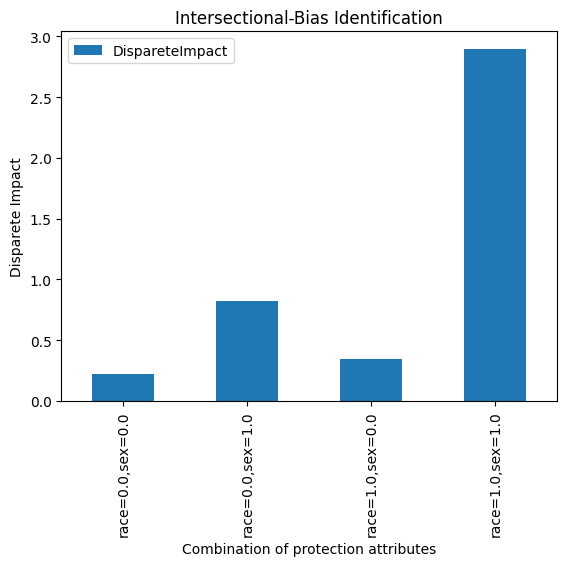

worstDI= 2.8961455591879814
Bias of input data
                  DispareteImpact
race=0.0,sex=0.0         0.220587
race=0.0,sex=1.0         0.820665
race=1.0,sex=0.0         0.345882
race=1.0,sex=1.0         2.896146
Bias mitigation start


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Bias mitigation end


<Figure size 800x600 with 0 Axes>

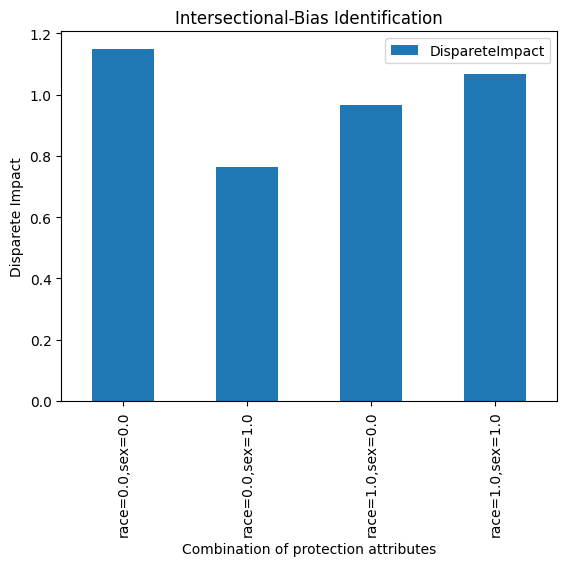

緩和後のバイアス
                  DispareteImpact
race=0.0,sex=0.0         1.149104
race=0.0,sex=1.0         0.762905
race=1.0,sex=0.0         0.964778
race=1.0,sex=1.0         1.067259
緩和後の精度
              group  base_rate  selection_rate  Balanced_Accuracy
0             total   0.202490        0.222701           0.901334
1  race:0.0_sex:0.0   0.046942        0.253556           0.891604
2  race:0.0_sex:1.0   0.168520        0.173082           0.996239
3  race:1.0_sex:0.0   0.084575        0.216864           0.927744
4  race:1.0_sex:1.0   0.274944        0.228497           0.915534


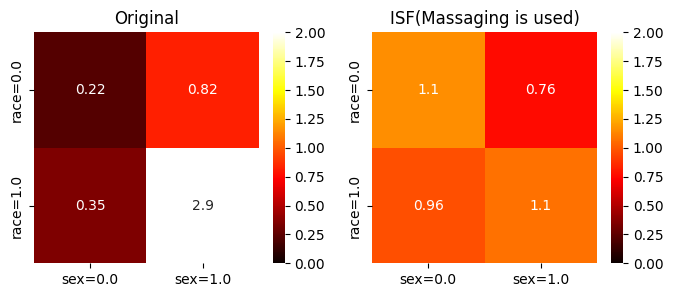

In [27]:
if __name__ == '__main__':
    main()

### #11 License

[required]

In [28]:
ait_owner='AIST'
ait_creation_year='2023'

### #12 Deployment

[uneditable] 

In [29]:
if not is_ait_launch:
    from ait_sdk.deploy import prepare_deploy
    from ait_sdk.license.license_generator import LicenseGenerator
    
    current_dir = %pwd
    prepare_deploy(ait_sdk_name, current_dir, requirements_path)
    
    # output License.txt
    license_generator = LicenseGenerator()
    license_generator.write('../top_dir/LICENSE.txt', ait_creation_year, ait_owner)
